## Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install Requirements

In [ ]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.8 MB/s eta 0:00:00


## Import Library

In [ ]:
import os
import shutil
from mtcnn import MTCNN
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt

## Deteksi Wajah

In [ ]:
# Path asal dataset
base_path = '/content/drive/MyDrive/STKI'
dataset_final_path = os.path.join(base_path, 'DatasetFinal')

# Path untuk hasil deteksi wajah
detectface_path = os.path.join(dataset_final_path, 'detectface')

# Inisialisasi MTCNN
detector = MTCNN()

In [ ]:
# Fungsi untuk memastikan folder ada
def ensure_folder_exists(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

# Fungsi untuk mendeteksi wajah dan menyimpannya
def detect_and_save_faces(source_folder, destination_folder, category):
    total_files = 0
    detected_files = 0
    undetected_files = 0
    detected_file_paths = []

    print(f"\nProses Deteksi Wajah untuk kategori: {category}")

    for subject in os.listdir(source_folder):
        subject_path = os.path.join(source_folder, subject)

        if os.path.isdir(subject_path):
            ensure_folder_exists(os.path.join(destination_folder, subject))

            for file_name in os.listdir(subject_path):
                if file_name.endswith(('.png', '.jpg', '.jpeg')):
                    total_files += 1
                    file_path = os.path.join(subject_path, file_name)

                    try:
                        # Buka gambar dan lakukan deteksi wajah
                        img = Image.open(file_path)
                        img = np.array(img)
                        faces = detector.detect_faces(img)

                        # Jika wajah terdeteksi, simpan file ke folder tujuan
                        if faces:
                            detected_files += 1
                            img_pil = Image.fromarray(img)
                            img_pil.save(os.path.join(destination_folder, subject, file_name))
                            detected_file_paths.append(file_path)
                            print(f"Deteksi wajah berhasil: {file_name} di folder {subject}")
                        else:
                            undetected_files += 1
                            print(f"Tidak ada wajah terdeteksi: {file_name} di folder {subject}")
                    except Exception as e:
                        print(f"Error saat mendeteksi {file_name}: {e}")
                        undetected_files += 1

    return total_files, detected_files, undetected_files, detected_file_paths

In [ ]:
# Pastikan folder detectface ada
ensure_folder_exists(detectface_path)

# Proses deteksi wajah untuk kategori Drowsy dan Non Drowsy
categories = ['Drowsy', 'Non Drowsy']

# Loop untuk kategori Drowsy dan Non Drowsy
total_all_files = 0
detected_all_files = 0
undetected_all_files = 0
detected_file_paths_all = {'Drowsy': [], 'Non Drowsy': []}

for category in categories:
    print(f"\n--- Deteksi Wajah untuk Kategori: {category} ---")
    source_category_path = os.path.join(dataset_final_path, 'train', category)
    destination_category_path = os.path.join(detectface_path, category)

    # Pastikan folder kategori Drowsy dan Non Drowsy ada di detectface
    ensure_folder_exists(destination_category_path)

    total_files, detected_files, undetected_files, detected_file_paths = detect_and_save_faces(
        source_category_path, destination_category_path, category)

    total_all_files += total_files
    detected_all_files += detected_files
    undetected_all_files += undetected_files
    detected_file_paths_all[category] = detected_file_paths

Streaming output truncated to the last 5000 lines.
Deteksi wajah berhasil: e0647.png di folder e
Deteksi wajah berhasil: e0642.png di folder e
Deteksi wajah berhasil: e0649.png di folder e
Deteksi wajah berhasil: e0648.png di folder e
Deteksi wajah berhasil: e0644.png di folder e
Deteksi wajah berhasil: e0673.png di folder e
Deteksi wajah berhasil: e0653.png di folder e
Deteksi wajah berhasil: e0662.png di folder e
Deteksi wajah berhasil: e0655.png di folder e
Deteksi wajah berhasil: e0656.png di folder e
Deteksi wajah berhasil: e0667.png di folder e
Deteksi wajah berhasil: e0657.png di folder e
Deteksi wajah berhasil: e0668.png di folder e
Deteksi wajah berhasil: e0670.png di folder e
Deteksi wajah berhasil: e0664.png di folder e
Deteksi wajah berhasil: e0672.png di folder e
Deteksi wajah berhasil: e0661.png di folder e
Deteksi wajah berhasil: e0654.png di folder e
Deteksi wajah berhasil: e0665.png di folder e
Deteksi wajah berhasil: e0666.png di folder e
Deteksi wajah berhasil: e0680

In [ ]:
# Print laporan akhir
print("--- Laporan Deteksi Wajah ---")
print(f"Total jumlah file untuk dideteksi: {total_all_files}")
print(f"Jumlah file untuk dideteksi (Drowsy): {total_files} (Drowsy)")
print(f"Jumlah file untuk dideteksi (Non Drowsy): {total_files} (Non Drowsy)")
print(f"\nTotal jumlah file berhasil dideteksi: {detected_all_files}")
print(f"Jumlah file berhasil dideteksi (Drowsy): {detected_files} (Drowsy)")
print(f"Jumlah file berhasil dideteksi (Non Drowsy): {detected_files} (Non Drowsy)")
print(f"\nTotal jumlah file tidak berhasil dideteksi: {undetected_all_files}")
print(f"Jumlah file tidak berhasil dideteksi (Drowsy): {undetected_files} (Drowsy)")
print(f"Jumlah file tidak berhasil dideteksi (Non Drowsy): {undetected_files} (Non Drowsy)")

--- Laporan Deteksi Wajah ---
Total jumlah file untuk dideteksi: 29255
Jumlah file untuk dideteksi (Drowsy): 13600 (Drowsy)
Jumlah file untuk dideteksi (Non Drowsy): 13600 (Non Drowsy)

Total jumlah file berhasil dideteksi: 29236
Jumlah file berhasil dideteksi (Drowsy): 13599 (Drowsy)
Jumlah file berhasil dideteksi (Non Drowsy): 13599 (Non Drowsy)

Total jumlah file tidak berhasil dideteksi: 19
Jumlah file tidak berhasil dideteksi (Drowsy): 1 (Drowsy)
Jumlah file tidak berhasil dideteksi (Non Drowsy): 1 (Non Drowsy)


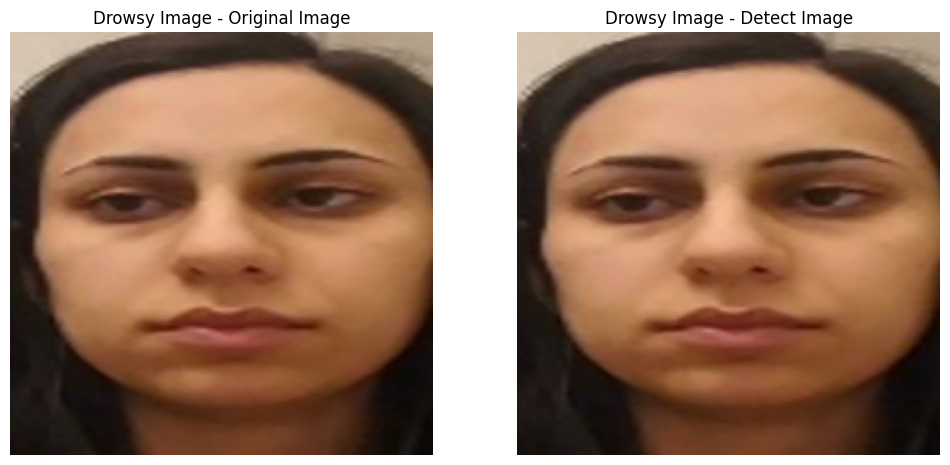

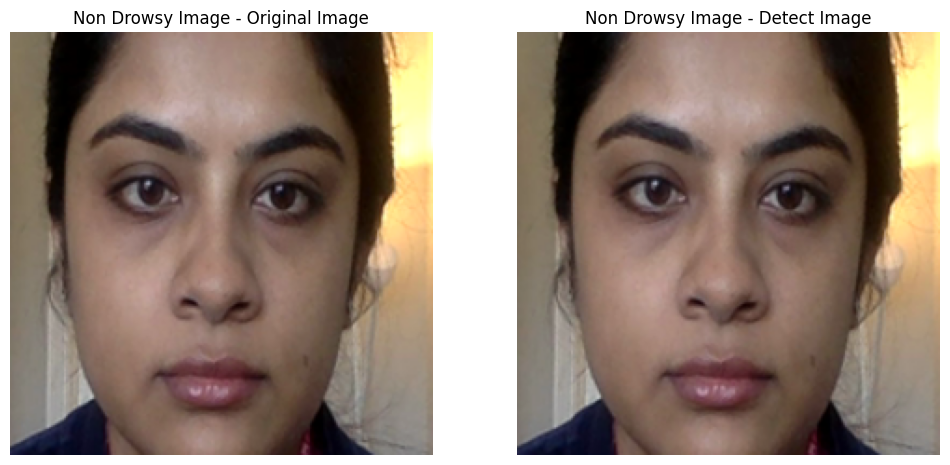

In [ ]:
# Visualisasi untuk perbandingan gambar asli dan setelah deteksi
def display_comparison_images(file_path, detected_file_path, title):
    original_img = Image.open(file_path)
    detected_img = Image.open(detected_file_path)

    # Menampilkan gambar
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(original_img)
    axes[0].set_title(f"{title} - Original Image")
    axes[0].axis('off')

    axes[1].imshow(detected_img)
    axes[1].set_title(f"{title} - Detect Image")
    axes[1].axis('off')

    plt.show()

# Pilih gambar acak dari kategori Drowsy dan Non Drowsy untuk visualisasi
if detected_file_paths_all['Drowsy']:
    random_drowsy_file = random.choice(detected_file_paths_all['Drowsy'])
    random_drowsy_detected = os.path.join(detectface_path, 'Drowsy', random_drowsy_file.split('/')[-2], random_drowsy_file.split('/')[-1])
    display_comparison_images(random_drowsy_file, random_drowsy_detected, "Drowsy Image")

if detected_file_paths_all['Non Drowsy']:
    random_non_drowsy_file = random.choice(detected_file_paths_all['Non Drowsy'])
    random_non_drowsy_detected = os.path.join(detectface_path, 'Non Drowsy', random_non_drowsy_file.split('/')[-2], random_non_drowsy_file.split('/')[-1])
    display_comparison_images(random_non_drowsy_file, random_non_drowsy_detected, "Non Drowsy Image")